Setups

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, filters
from skimage.util import img_as_float

Harris Corner Detector

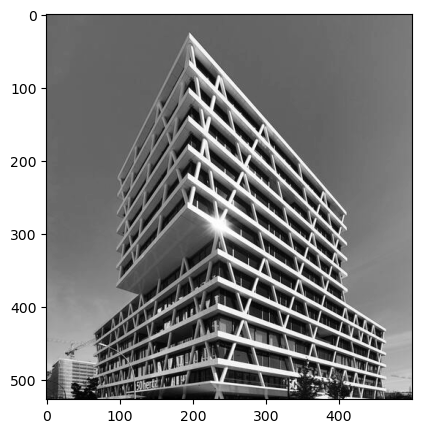

In [2]:
#load the pic building2
image = color.rgb2gray(img_as_float(io.imread('data/resources/building2.jpg')))
#plot
plt.figure(figsize=(7.5, 5))
plt.imshow(image, cmap='gray')
plt.show()

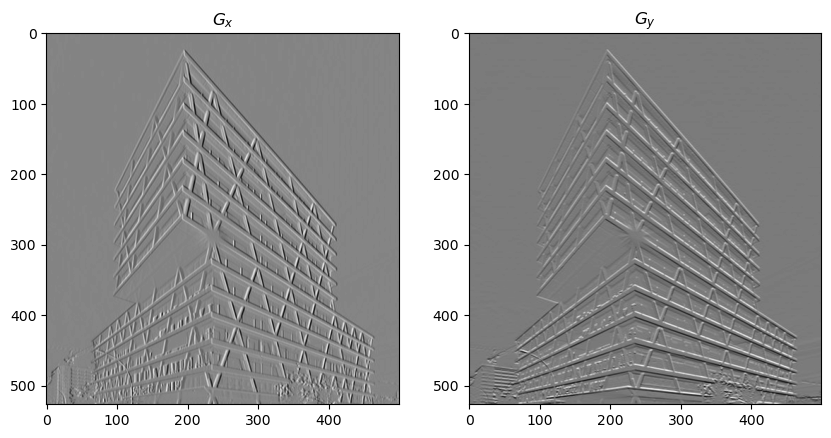

In [3]:
#calculate derivation of image in x, y axis with sobel filtering
def compute_derivation(image):
    gx = filters.sobel_v(image)
    gy = filters.sobel_h(image)
    return gx, gy

gx,gy = compute_derivation(image)
#plot result
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(gx, cmap='gray')
axs[0].set_title('$G_x$')
axs[1].imshow(gy, cmap='gray')
axs[1].set_title('$G_y$')
plt.show()

In [4]:
#caluculate the Harris matrix
def compute_harris_matrices(gx, gy):
#a 4 dimension array, every pixel has a 2x2 matrix
    harris_matrices = np.empty((gx.shape[0], gx.shape[1], 2, 2))
    harris_matrices[:, :, 0, 0] = filters.gaussian(gx * gx)
    harris_matrices[:, :, 0, 1] = filters.gaussian(gx * gy)
    harris_matrices[:, :, 1, 0] = harris_matrices[:, :, 0, 1]
    harris_matrices[:, :, 1, 1] = filters.gaussian(gy * gy)
    return harris_matrices

harris_matrices = compute_harris_matrices(gx, gy)

Calculate cornerness with: $$ C(x, y) = \text{det}(\mathbf{M}) - \kappa (\text{Tr}(\mathbf{M}))^2. $$
$\kappa = 0.1$

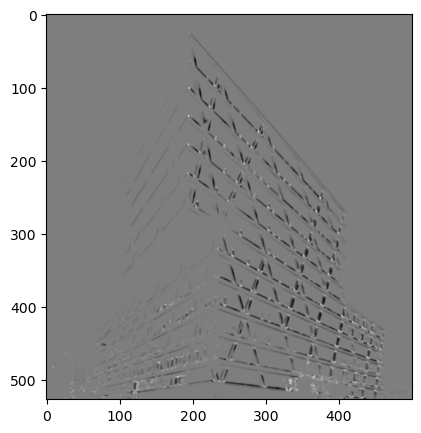

In [5]:
def compute_cornerness(harris_matrices, kappa):
    return np.linalg.det(harris_matrices) - kappa * np.square(np.trace(harris_matrices, axis1=2, axis2=3))

cornerness = compute_cornerness(harris_matrices, 0.1)
#plot
plt.figure(figsize=(7.5, 5))
plt.imshow(cornerness, cmap='gray')
plt.show()

detect the corner

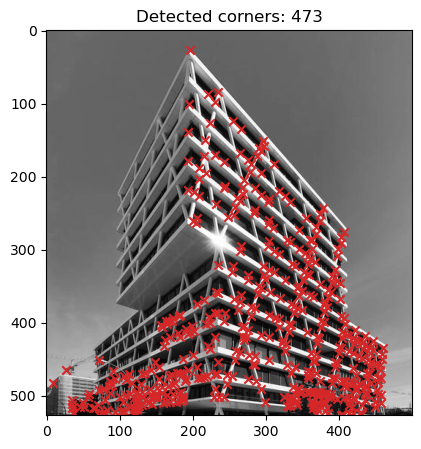

In [6]:
def detect_corners(cornerness, threshold):
    # Thresholding and non-maximum suppression
    cornerness = np.pad(cornerness, 1)
    candidates = cornerness > threshold
    corners = []
    for i, j in np.transpose(np.nonzero(candidates)):
        if cornerness[i, j] == np.max(cornerness[i-1:i+2, j-1:j+2]):
            corners.append([i-1, j-1])  # Remove offset due to padding
    corners = np.stack(corners, axis=0)
    return corners

corners = detect_corners(cornerness, 0.1 * np.max(cornerness))
plt.figure(figsize=(7.5, 5))
plt.imshow(image, cmap='gray')
plt.scatter(corners[:, 1], corners[:, 0], marker='x', color='tab:red')
#corners is a array, the elements are [i,j] as a position, but scatter needs x, y
#so we need all the j ([:,1]) as x, and all the i ([:, 0]) as y
plt.title(f"Detected corners: {len(corners)}")
plt.show()